# Energy-level diagrams

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from qutip import about, qeye, sigmax, sigmaz, tensor

%matplotlib inline

## Energy spectrum of three coupled qubits

In [2]:
def compute(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())

    idx = 0
    evals_mat = np.zeros((len(w1list), 2 * 2 * 2))
    for w1 in w1list:

        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

        evals_mat[idx, :] = np.real(evals)

        idx += 1

    return evals_mat

In [3]:
w1 = 1.0 * 2 * pi  # atom 1 frequency: sweep this one
w2 = 0.9 * 2 * pi  # atom 2 frequency
w3 = 1.1 * 2 * pi  # atom 3 frequency
g12 = 0.05 * 2 * pi  # atom1-atom2 coupling strength
g13 = 0.05 * 2 * pi  # atom1-atom3 coupling strength

w1list = np.linspace(0.75, 1.25, 50) * 2 * pi  # atom 1 frequency range

In [4]:
evals_mat = compute(w1list, w2, w3, g12, g13)

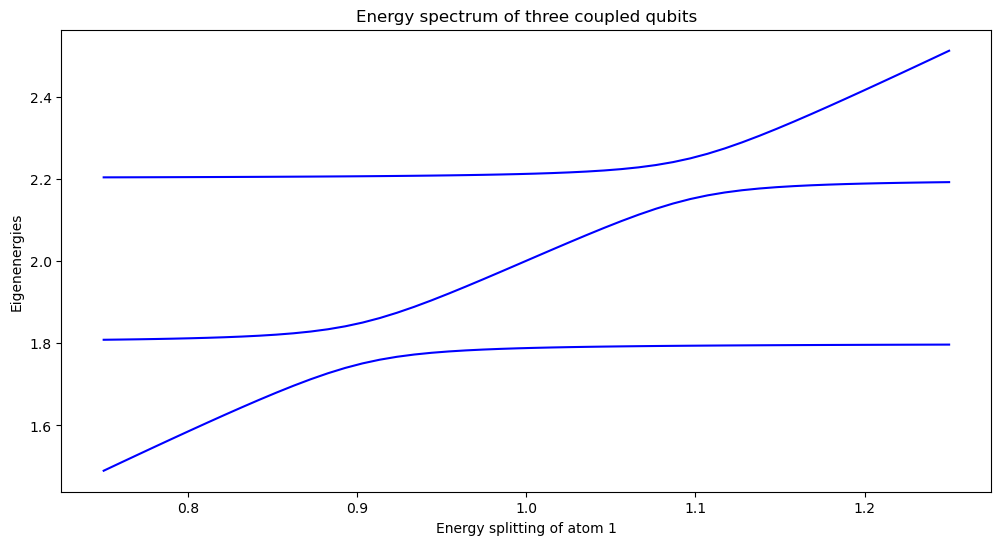

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

for n in [1, 2, 3]:
    ax.plot(w1list / (2 * pi),
            (evals_mat[:, n] - evals_mat[:, 0]) / (2 * pi), "b")

ax.set_xlabel("Energy splitting of atom 1")
ax.set_ylabel("Eigenenergies")
ax.set_title("Energy spectrum of three coupled qubits");

## Versions

In [6]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.2.0.dev0+4033695
Numpy Version:      2.2.4
Scipy Version:      1.15.2
Cython Version:     3.0.12
Matplotlib Version: 3.10.1
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          Generic
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------



qutip-jax: 0.1.1.dev5
qutip-qtrl: 0.2.0.dev0+acb71a0
qutip-qip: 0.5.0.dev0+d58a82d

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
